In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  print("Running in Colab.\nCloning Repo...\n")
  %cd /content
  !git clone https://github.com/ColourlessSpearmint/Mantis.git
  %cd Mantis


In [2]:
import os
import sys
import matplotlib.pyplot as plt

# Add the src directory to the Python path so game module can be imported
if IN_COLAB:
  sys.path.append(os.path.abspath(os.path.join('..', 'Mantis/src')))
else:
  sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from game import bot_duel

def run_duel(games):
  winners = []
  turns_list = []
  for i in range(games):
    winner, turns, state = bot_duel(verbose=False)
    winners.append(winner)
    turns_list.append(turns)
  return winners

def map_to_bot_names(data):
  """
  Maps input numbers to corresponding bot names:
    0 -> "MatcherBot"
    1 -> "ScorerBot"
    2 -> "ThiefBot"
    3 -> "RandomBot"

  Args:
    data: A list of numbers.

  Returns:
    A list of strings, where each number is replaced by its corresponding bot name.
  """

  bot_names = {
      0: "MatcherBot",
      1: "ScorerBot",
      2: "ThiefBot",
      3: "RandomBot"
  }

  return [bot_names.get(item, "UnknownBot") for item in data]

def plot_common_items(data):
  """
  Plots the frequency of items in the given list.

  Args:
    data: A list of items.

  Returns:
    None
  """

  # Count the occurrences of each item
  item_counts = {}
  for item in data:
    if item in item_counts:
      item_counts[item] += 1
    else:
      item_counts[item] = 1

  # Sort the items by frequency in descending order
  sorted_items = sorted(item_counts.items(), key=lambda x: x[1], reverse=True)

  # Extract the items and their frequencies
  items, frequencies = zip(*sorted_items)

  # Create the bar plot
  plt.bar(items, frequencies)
  plt.xlabel('Items')
  plt.ylabel('Frequency')
  plt.title('Frequency of Items')
  plt.show()


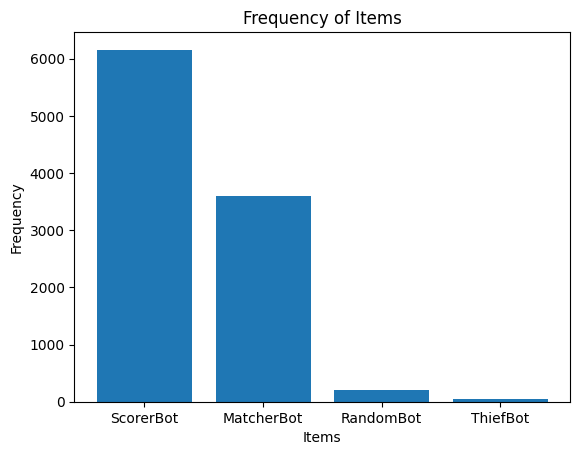

In [3]:
games = 10000 # @param {"type":"integer"}
plot_common_items(map_to_bot_names(run_duel(games)))